<div style="border:solid Chocolate 2px; padding: 40px">

<b>Денис, привет!👋</b>

Меня зовут Александр Куимов, я буду ревьюером твоего проекта. Ты можешь обращаться ко мне на "ты"😏 Надеюсь, тебя также не смутит, если я буду обращаться к тебе на "ты", но если это неудобно, обязательно скажи об этом!

Пожалуйста, не удаляй мои комментарии, они будут особенно полезны для нашей работы в случае повторной проверки проекта. 

Ты также можешь реагировать на мои комментарии своими, выделяя их цветами и наиболее понравившимся тебе способом оформления, но явно  отличающимся от моих комментариев. Это нужно, чтобы не создавалась путаница😉

Ты можешь найти мои комментарии, обозначенные <font color='green'>зеленым</font>, <font color='gold'>желтым</font> и <font color='red'>красным</font> цветами, например:

<br/>

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> В случае, если решение на отдельном шаге является полностью правильным.
</div>

<br/>

<div class="alert alert-warning">
    <h2> Комментарий ревьюера <a class="tocSkip"> </h2>
    
<b>Некоторые замечания и рекомендации💡:</b> В случае, когда решение на отдельном шаге станет еще лучше, если внести небольшие коррективы.
</div>


<br/>
<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера <a class="tocSkip"></h2>

    
<b>На доработку🤔:</b>
 В случае, когда решение на отдельном шаге требует существенной переработки и внесения правок. Напоминаю, что проект не может быть принят с первого раза, если ревью содержит комментарии, рекомендующие доработать шаги.
</div>
    
Увидев у тебя неточность, в первый раз я лишь укажу на ее наличие и дам тебе возможность самому найти и исправить ее. На реальной работе твой руководитель будет поступать также, и я пытаюсь подготовить тебя именно к работе датасаентистом. Но если ты пока не справишься с такой задачей - при следующей проверке я дам более точную подсказку!🤓

# Определение возраста покупателей

Сетевой супермаркет «Хлеб-Соль» внедряет систему компьютерного зрения для обработки фотографий покупателей. Фотофиксация в прикассовой зоне поможет определять возраст клиентов, чтобы:

1) Анализировать покупки и предлагать товары, которые могут заинтересовать покупателей этой возрастной группы;

2) Контролировать добросовестность кассиров при продаже алкоголя.

Постройте модель, которая по фотографии определит приблизительный возраст человека. В вашем распоряжении набор фотографий людей с указанием возраста.

<div class="alert alert-warning">
    <h2> Комментарий ревьюера <a class="tocSkip"> </h2>
    
<b>Некоторые замечания и рекомендации💡:</b>  
    
Я бы посоветовал тебе подробнее раскрыть план своей работы. Это поможет тебе расставлять акценты в выводах.

<div class="alert alert-info">
    <h2> Комментарий студента <a class="tocSkip"> </h2>
    
Вставил выше описание проекта, дало сразу мысли по выводам качества итоговой модели.

<div class="alert alert-success">
<h2> Комментарий ревьюера v.2 <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> Молодец)

## Исследовательский анализ данных

### Подключение библиотек и модулей

In [1]:
# ячейка для подключения модулей python  и настроек отображения
import pandas as pd
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import numpy as np
import matplotlib.pyplot as plt

# Константа псевдослучайности для алгоритмов обучения
RANDOM = 1111

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> 
    
 Молодец, что собираешь импорты в одну ячейку и помещаешь ее в начале проекта!

In [2]:
labels = pd.read_csv('/datasets/faces/labels.csv')
train_datagen = ImageDataGenerator(rescale=1./255)
train_gen_flow = train_datagen.flow_from_dataframe(
        dataframe=labels,
        directory='/datasets/faces/final_files/',
        x_col='file_name',
        y_col='real_age',
        target_size=(224, 224),
        batch_size=32,
        class_mode='raw',
        seed=12345) 

Found 7591 validated image filenames.


### Оценка размера датасета

In [3]:
print('Количество изображений в датасете:',labels.shape[0])

Количество изображений в датасете: 7591


<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> 
    
Размер выборки выведен. Можно тут еще добавить несколько слов, большая ли она, и как это скажется на обучении модели.

<div class="alert alert-info">
    <h2> Комментарий студента <a class="tocSkip"> </h2>
    
Сложно оценить с моим небольшим опытом достаточность размера выборки, ясное дело, что чем больше выборка тем модель должна лучше обучиться.
        
Читал, что для задачи классификации желательно под один класс иметь 1000 примеров, допускаю, что нашу задачу регресии по определению возраста, можно преобразовать в задачу классификации со 100 классами (сто диапазонов возраста от 1 года до 100 лет). Тогда для хорошего обучения модели желательно иметь 1000*100 = 100 000 изображений. 

Это говорит о том, что наша выборка крайне скудна, темболее мы отнимаем 25% под валидацию.
        
Интересно, а как бы ты оценил размер выборки для регрессии? Какой использовал подход?

<div class="alert alert-success">
<h2> Комментарий ревьюера v.2 <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> 

Согласен с твоими рассуждениями. Добавлю, что мы еще можем нарастить ее, применяя аугментации.

### График распределения возраста в выборке

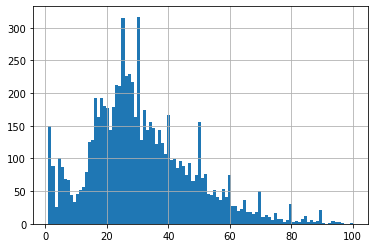

In [4]:
labels['real_age'].hist(bins=100)
plt.show()

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> 
    
Гистограмма целевого признака выведена верно. Обрати внимание на пики в районе "юбилейных" лет, они тут могут быть связаны с тем, что настоящий возраст был неизвестен тому, кто размечал датасет, и он попросту округлял его. Поэтому, некоторые "круглые" года в датасете некорректные.

<div class="alert alert-info">
    <h2> Комментарий студента <a class="tocSkip"> </h2>
    
Да, на выбросы внимание обратил, но их природу не уловил. Спасибо!

### Вывод 15 фотографий

Выведем 15 фотографий с отображением возраста по следующему правилу: i-ая фотография в i-ом батче.

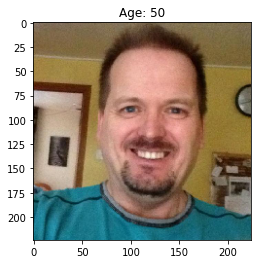

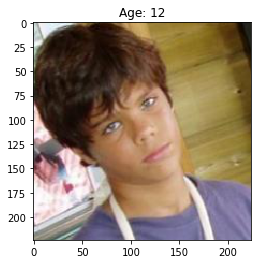

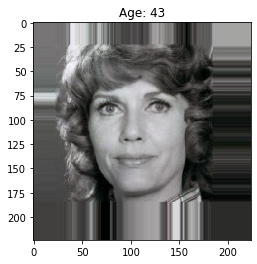

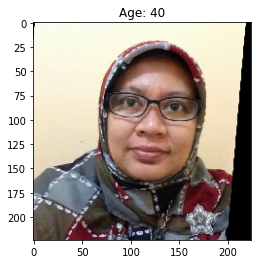

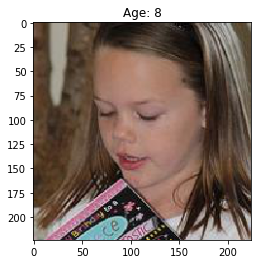

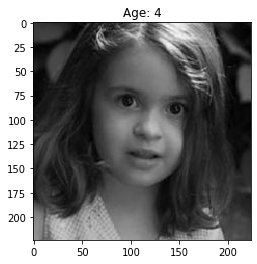

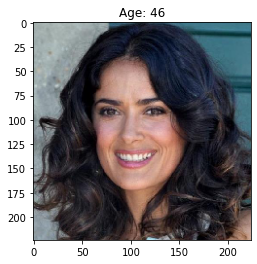

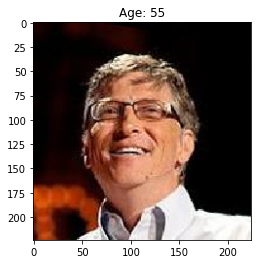

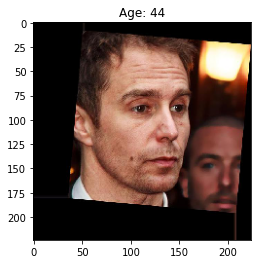

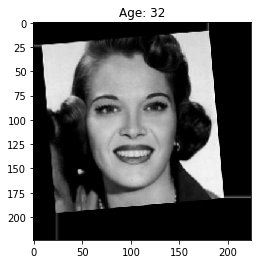

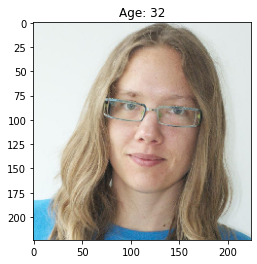

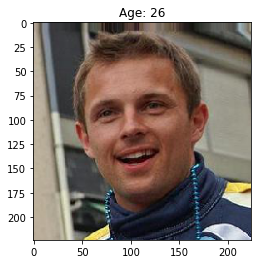

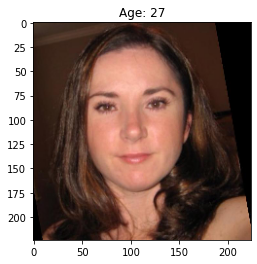

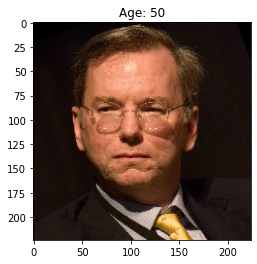

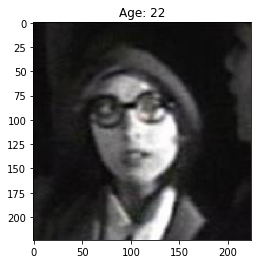

In [5]:
for i in range(15):
    plt.imshow(train_gen_flow[i][0][i])
    plt.title('Age: ' + str(train_gen_flow[i][1][i]))
    plt.show()

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b>
    
Примеры фотографий выведены!
    
Можно еще поработать над оформлением графика с фото (название самого графика).

<div class="alert alert-info">
    <h2> Комментарий студента <a class="tocSkip"> </h2>
    
Сделал вывод возраста вместо функции `print`, параметром `title`.

<div class="alert alert-success">
<h2> Комментарий ревьюера v.2 <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> Вижу, хорошо.

### Выводы исследовательский анализ данных
1) в датасете возраст распределён не равномерно, что будет приводить к перекосу в пользу возраста 15-40 лет,

2) имеется несколько выбросов в районе 1, 25, 30, 40, 50 лет,

3) имеется большой объём фотографий маленьких детей, до 10 лет, который наврятли будут самостоятельно производить покупки в маганзине,

Добавленные выводы:

4) ориентация большинства фотографий вертикальная, видно что некоторые фото были ранее предобработаны функцией поворота (дополнительно производить поворот необходимости нет),

5) на 15 фотографий пришлось 4 чёрнобелых изображения,

6) размеры всех изображений составляют 244x244, хотя видно, что некоторые из них при применении поворота уменьшили полезную площадь изображения.

<br/>
<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера <a class="tocSkip"></h2>
    
<b>На доработку🤔:</b>
    
Тут следует еще указать в выводе, какова общая ориентация фотографий (нужно ли их поворачивать), есть ли черно-белые фотографии, различается ли размер изображений?
Добавь, пожалуйста.
 </div>

<div class="alert alert-info">
    <h2> Комментарий студента <a class="tocSkip"> </h2>
        
        Добавил выводы.
    
У меня возник вопрос: как быть с датасетом в котором имеются как цветные так и чернобелые изображения, у них разное число цветовых каналов?
        
Мне кажется нужно конечно смотреть на то, как модель будет использоваться в бизнесе, допустим будут установлены цветные видеокамеры у касс, тогда конечно нужно тренировать модель работать с цветами. 
        
Но насколько корректно обучать модель на смеси цветных и чернобелых изображений?

<div class="alert alert-success">
<h2> Комментарий ревьюера v.2 <a class="tocSkip"> </h2>
​
<b>Все отлично!👍:</b> 
    
- В нашем проекте не предполагается что-то делать с ч/б фото, их процент невелик и  у них кстати тоже 3 канала.  Обучение модели на смеси цветных и чернобелых изображений будет корректным, сети просто будет сложнее обучиться.
- Общая ориентация фотографий примерно одинакова - в некоторых фото их уже повернули за нас, чтобы выровнять положение лица, значит нам их не обязательно поворачивать, а начальный размер изображений отличается, в силу того, что визуально заметно различное качество фото, где-то есть черные рамки (они не несут полезной информации). В итоге, размер изображений мы приведем к единому перед обучением модели.    

## Обучение модели

Перенесите сюда код обучения модели и её результат вывода на экран.


(Код в этом разделе запускается в отдельном GPU-тренажёре, поэтому оформлен не как ячейка с кодом, а как код в текстовой ячейке)

### Код модели

```python

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.applications.resnet import ResNet50
import pandas as pd

def load_train(path):
    labels = pd.read_csv(path + 'labels.csv')
    datagen = ImageDataGenerator(validation_split=0.25, rescale=1./255)
    train_gen_flow = datagen.flow_from_dataframe(
        dataframe=labels,
        directory=path + 'final_files/',
        x_col='file_name',
        y_col='real_age',
        target_size=(224, 224),
        batch_size=32,
        class_mode='raw',
        subset='training',
        seed=12345)

    return train_gen_flow

def load_test(path):
    labels = pd.read_csv(path + 'labels.csv')
    datagen = ImageDataGenerator(validation_split=0.25, rescale=1./255)
    test_gen_flow = datagen.flow_from_dataframe(
        dataframe=labels,
        directory=path + 'final_files/',
        x_col='file_name',
        y_col='real_age',
        target_size=(224, 224),
        batch_size=32,
        class_mode='raw',
        subset='validation',
        seed=12345)

    return test_gen_flow

def create_model(input_shape):

    backbone = ResNet50(input_shape=input_shape,
                    weights='/datasets/keras_models/resnet50_weights_tf_dim_ordering_tf_kernels_notop.h5',
                    include_top=False)
    model = Sequential()
    model.add(backbone)
    model.add(GlobalAveragePooling2D())
    model.add(Dense(1, activation='relu'))

    optimizer = Adam(lr=0.0001)
    model.compile(optimizer=optimizer, loss='mean_squared_error',
                  metrics=['mae'])


    return model

def train_model(model, train_data, test_data, batch_size=None, epochs=10,
                steps_per_epoch=None, validation_steps=None):

    model.fit(train_data,
              validation_data=test_data,
              batch_size=batch_size,
              epochs=epochs,
              steps_per_epoch=steps_per_epoch,
              validation_steps=validation_steps,
              verbose=2)

    return model

```

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b>

Модель определена правильно!
        
- Желательно еще добавить горизонтальный флип на тренировочной части. По сути это позволило бы увеличить выборку в 2 раза. Причем изображения полученные таким образом были бы неотличимы от настоящих.
- Cейчас у тебя созданы генераторы с одинаковым именем. Желательно создать отдельные генераторы с разными именами. Так будет лучше читаемость кода.

<div class="alert alert-info">
    <h2> Комментарий студента <a class="tocSkip"> </h2>
    
Я пробовал делать горизонтальный флип на тренировочной части, если честно, это не дало какого то заметного улучшения MAE (вероятно всязано с тем, что изначально MAE получилось с хорошим значением).
        
Насчёт генераторов спасибо, учту на будующее.

<div class="alert alert-success">
<h2> Комментарий ревьюера v.2 <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> 
Пожалуйста)

### Результаты вывода процесса обучения модели

```

Train for 178 steps, validate for 60 steps
Epoch 1/10
2022-08-26 11:36:20.430508: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcublas.so.10
2022-08-26 11:36:20.758312: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcudnn.so.7
178/178 - 47s - loss: 233.6688 - mae: 11.0237 - val_loss: 996.3919 - val_mae: 26.8585
Epoch 2/10
178/178 - 38s - loss: 62.5172 - mae: 5.9972 - val_loss: 920.2291 - val_mae: 25.5261
Epoch 3/10
178/178 - 37s - loss: 30.0851 - mae: 4.2248 - val_loss: 346.7210 - val_mae: 14.0534
Epoch 4/10
178/178 - 37s - loss: 18.6897 - mae: 3.3284 - val_loss: 113.9124 - val_mae: 8.0534
Epoch 5/10
178/178 - 37s - loss: 14.0999 - mae: 2.9060 - val_loss: 74.8851 - val_mae: 6.5832
Epoch 6/10
178/178 - 37s - loss: 11.5355 - mae: 2.6146 - val_loss: 69.2328 - val_mae: 6.3603
Epoch 7/10
178/178 - 38s - loss: 10.5182 - mae: 2.5005 - val_loss: 69.1799 - val_mae: 6.3282
Epoch 8/10
178/178 - 37s - loss: 10.0397 - mae: 2.4095 - val_loss: 67.7205 - val_mae: 6.2400
Epoch 9/10
178/178 - 37s - loss: 9.5394 - mae: 2.3531 - val_loss: 78.5955 - val_mae: 6.5603
Epoch 10/10
178/178 - 37s - loss: 8.8111 - mae: 2.2412 - val_loss: 69.9792 - val_mae: 6.2288
WARNING:tensorflow:sample_weight modes were coerced from
  ...
    to  
  ['...']
60/60 - 9s - loss: 69.9792 - mae: 6.2288
Test MAE: 6.2288

```

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> 
    
Отличный результат по метрике)

## Анализ обученной модели

1. Построена модель на базе предобученной модели ResNet50 на имеющихся данных.
2. Данные разбиты на обучающую и тестовые части в отношении 0.75/0.25.
3. Итоговое значение MAE получилось 6.2288, что удовлетворяет поставленной задаче (не более 8).

Добывленные выводы:

4. Первая цель проекта: предлагать товары которые могут заинтересовать возрастную группу, данная задача может решаться данной моделью, так как ошибка в 6 лет позволяет относительно неплохо отделять молодеж, средний возраст и пожилых.
5. Вторая цель проекта: контроль продажи алкоголя несовершеннолетним не может быть решена, так как ошибка в 6 лет для диапазона молодёжи слишком велика.
6. Общая структура модели последовательная: 
    - предобученная модель ResNet50 без двух последних слоёв с возможностью дообучения, 
    - далее слой GlobalAveragePooling2D, для получения 512 каналов (фичей),
    - полносвязный выходной слой из одного нейрона с функцией активации "ReLu".
7. В нейросети применён оптимизатор Adam  с шагом 0,0001, функция потерь MSE.

<div class="alert alert-warning">
    <h2> Комментарий ревьюера <a class="tocSkip"> </h2>
    
<b>Некоторые замечания и рекомендации💡:</b> 

- Пожалуйста, подробнее опиши использованную модель и параметры.
- Можно было еще сказать несколько слов о бизнесе. Позволяет ли полученная модель решить поставленные бизнесом задачи?
      

<div class="alert alert-info">
    <h2> Комментарий студента <a class="tocSkip"> </h2>
    
Добавил выводы.

<div class="alert alert-success">
<h2> Комментарий ревьюера v.2 <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> Выводы вполне логичные)

<div class="alert alert-success">
<h2> Комментарий ревьюера v.2 <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> 

Могу поделиться такими ссылками для углубленного изучения темы спринта:
    
- Видеокурс от Stanford University: https://www.youtube.com/watch?v=vT1JzLTH4G4&list=PLC1qU-LWwrF64f4QKQT-Vg5Wr4qEE1Zxk
    
- Курс от Физтех-школы Прикладной Математики и Информатики МФТИ: https://vk.com/dlschool_mipt
    
- Курс Нейронные сети и компьютерное зрение от Sumsung: https://stepik.org/course/50352/promo#toc

## Чек-лист

- [x]  Jupyter Notebook открыт
- [ ]  Весь код выполняется без ошибок
- [ ]  Ячейки с кодом расположены в порядке исполнения
- [ ]  Исследовательский анализ данных выполнен
- [ ]  Результаты исследовательского анализа данных перенесены в финальную тетрадь
- [ ]  MAE модели не больше 8
- [ ]  Код обучения модели скопирован в финальную тетрадь
- [ ]  Результат вывода модели на экран перенесён в финальную тетрадь
- [ ]  По итогам обучения модели сделаны выводы

<div style="border:solid Chocolate 2px; padding: 40px">


<h2> Итоговый комментарий ревьюера v.1 <a class="tocSkip"> </h2>    
    
  
У меня сложилось хорошее общее впечатление о проекте, тебе удалось неплохо справиться с проектом. Молодец! Загружены данные для анализа, изучен каждый параметр, модель построена и протестирована. Тебе удалось успешно справиться с первой задачей в области компьютерного зрения. Поздравляю!
    
Отмечу отдельные положительные моменты проекта🙂:
    
- радует, что проект хорошо структурирован, приятно проверять такие работы;
- есть красивые визуализации в проекте.
    
Есть несколько моментов всего, на которые стоит ещё раз взглянуть. 
Предлагаю тебе доработать проект по моим комментариям, чтобы довести его до совершенства:

- Указать в выводе, какова общая ориентация фотографий (нужно ли их поворачивать), есть ли черно-белые фотографии, различается ли размер изображений.
    
Если будут вопросы, обращайся, с удовольствием на них отвечу.  
</div>

<div class="alert alert-info">
    <h2> Комментарий студента <a class="tocSkip"> </h2>
    
Спасибо за ревью!

<div style="border:solid Chocolate 2px; padding: 40px">


<h2> Итоговый комментарий ревьюера v.2 <a class="tocSkip"> </h2>    
    
     
  
Теперь почти идеально, молодец! Принимаю твой проект)
    
    
В этом проекте все шаги отработаны. С интересом читал твои размышления, код и выводы. Что ещё для дальнейшего улучшения качества возможно сделать?
    
Опишу здесь некоторые идеи:
    
1. Качество данных на входе: оценить еще раз возраст по фото.
2. Анализ ошибок: к примеру модель сильно ошибается на сегменте пожилых людей, зато почти идеально работает с детьми. Тогда мы поймем, каких возрастов фото было бы хорошо добавить в выборку для дообучения.
3. Дополнительно изучить распределение целевого признака, возможно что выборка была составлена неслучайным образом (видна небольшая бимодальность), посмотреть, каких возрастных групп представлено мало, чтобы их потом добавить в выборку.
    
Но цель нашего проекта достигнута. Рад был тебе помочь)
    
Преподаватель в Slack будет рад помочь, если у тебя появятся вопросы. Удачи тебе в финальном проекте!
  
</div>